In [1]:
import shap
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split

c:\Users\admin\Documents\Untitled Folder 1\NewFinalpR\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv('clear_data.csv')

In [3]:
X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
model = joblib.load('random_forest_pancreatic_model.pkl')

In [6]:
explainer = shap.TreeExplainer(model)

In [7]:
shap_values = explainer.shap_values(X_test)

In [9]:
print("Type of shap_values:", type(shap_values))
if isinstance(shap_values, list):
    print("Number of classes (shap_values list):", len(shap_values))
    print("Shape of one class SHAP:", shap_values[0].shape)
else:
    print("SHAP array shape:", shap_values.shape)


Type of shap_values: <class 'numpy.ndarray'>
SHAP array shape: (118, 13, 3)


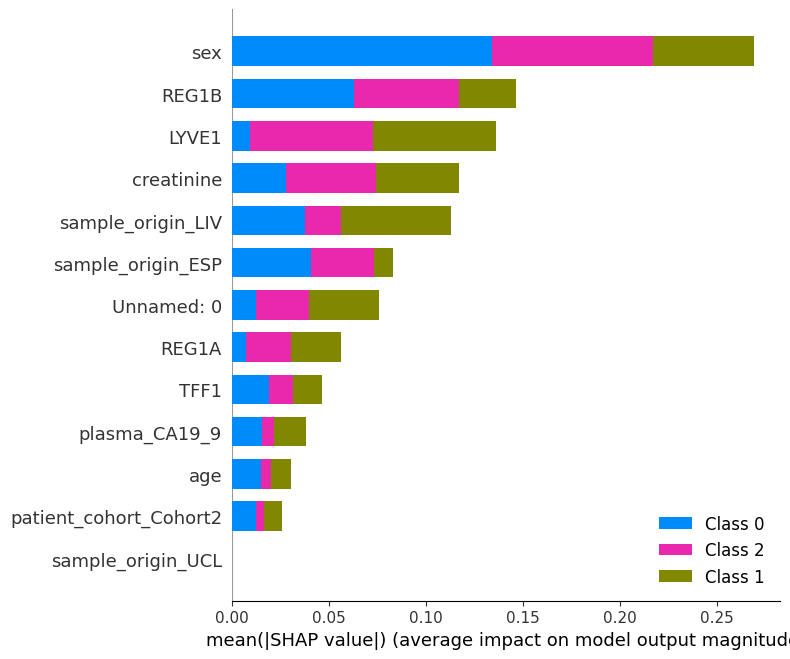

In [10]:
if isinstance(shap_values, list) and len(shap_values) == 2:
    # Class 1 explanations
    shap.summary_plot(shap_values[1], X_test, plot_type="bar")
else:
    # If shap_values is not a list, use directly
    shap.summary_plot(shap_values, X_test, plot_type="bar")

Summary for class 0


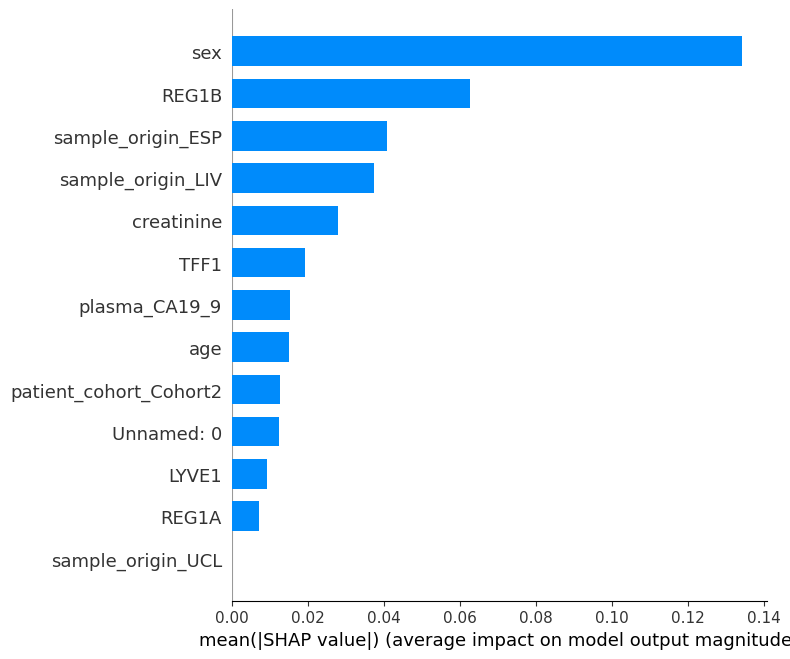

Summary for class 1


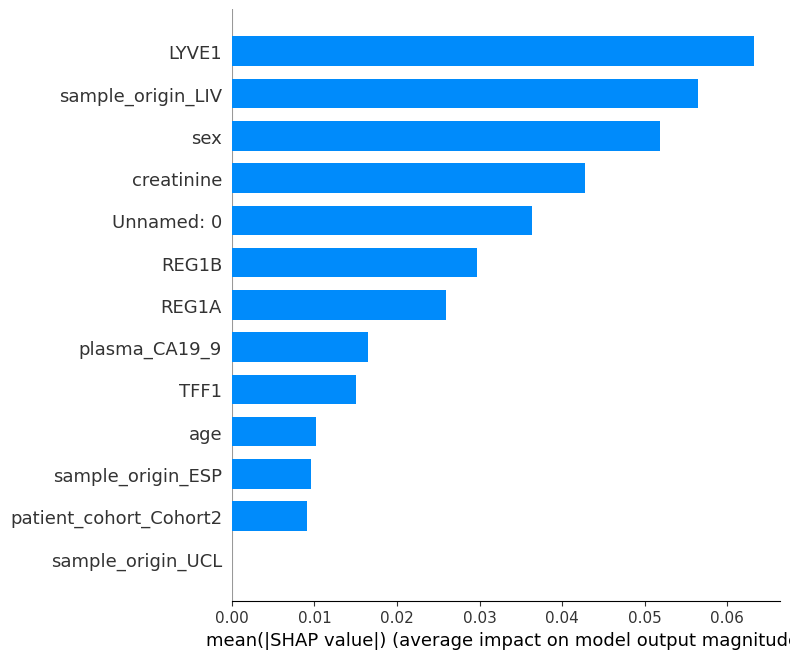

Summary for class 2


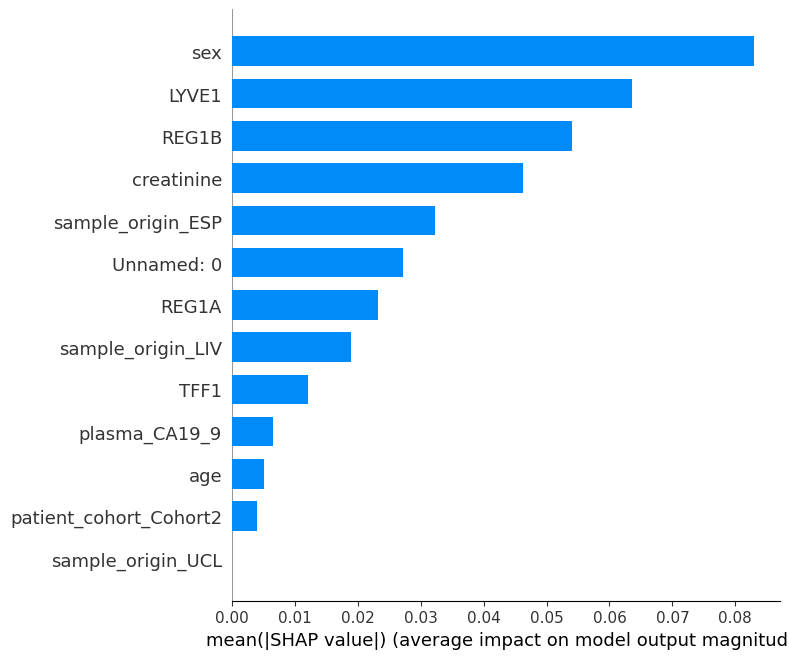

In [12]:
for i in range(shap_values.shape[2]):
    print(f"Summary for class {i}")
    shap.summary_plot(shap_values[:, :, i], X_test, plot_type="bar")


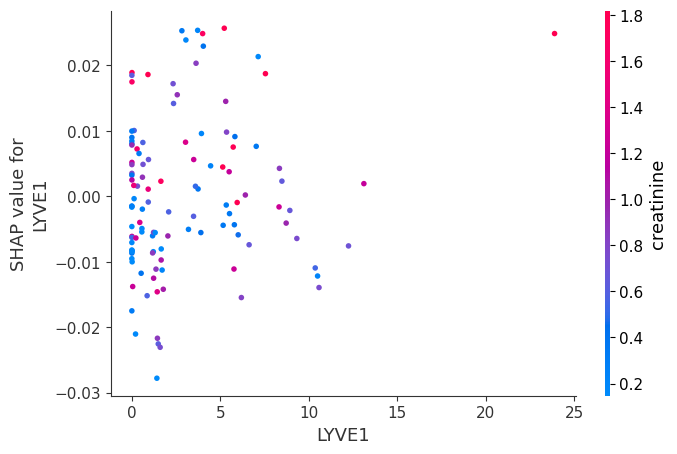

In [16]:
shap.dependence_plot("LYVE1", shap_values[:, :, 0], X_test)


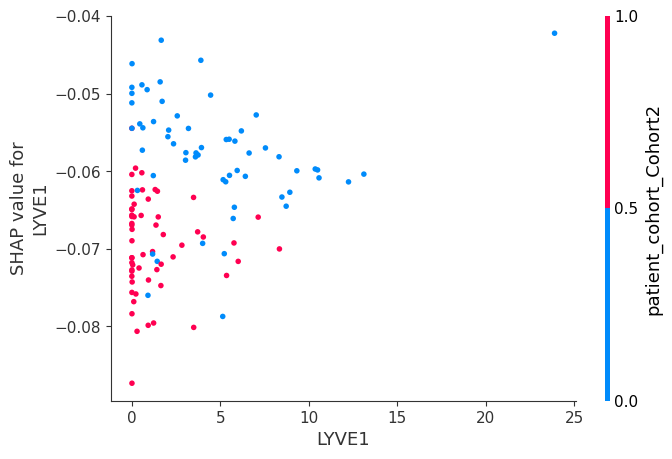

In [17]:
shap.dependence_plot("LYVE1", shap_values[:, :, 2], X_test)

In [ ]:
# import uuid
# import os

# def generate_shap_plot(model, df):
#     explainer = shap.TreeExplainer(model)
#     shap_values = explainer.shap_values(df)

#     # Save SHAP summary plot
#     plt.figure()
#     shap.summary_plot(shap_values, df, show=False)
    
#     # Save with unique name
#     filename = f"static/shap_plot_{uuid.uuid4().hex}.png"
#     plt.savefig(filename, bbox_inches='tight')
#     plt.close()
#     return filename
